# **فاطمه امیری**

شماره دانشجویی: **40202424**

مینی پروژه شماره یک
درس یادگیری ماشین


# سوال اول

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from mpl_toolkits.mplot3d import Axes3D

## بخش دوم


In [ ]:
x, y = make_classification(n_samples=1000, n_features=3, n_classes=4, n_clusters_per_class=1, n_redundant=0, random_state=24, class_sep=1)
print(f'Shape of input (x) is: {x.shape} and Shape of label (y) is: {y.shape}')

Shape of input (x) is: (1000, 3) and Shape of label (y) is: (1000,)


In [ ]:
#plt.scatter(x[:, 0], x[:, 1],x[:, 2], c=y)

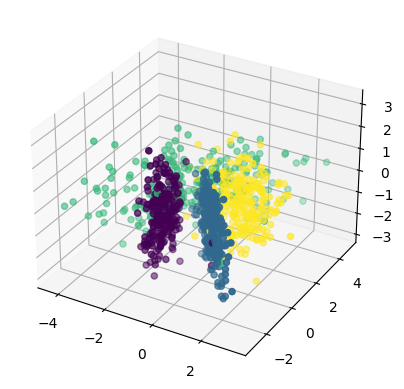

In [ ]:
# Create a 3D scatter plot# Create a 3D scatter plot
plt.figure().add_subplot(111, projection='3d').scatter(x[:, 0], x[:, 1], x[:, 2], c=y)

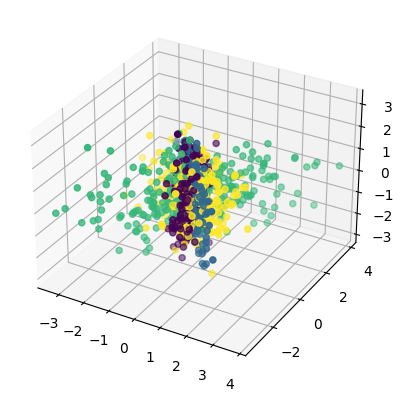

In [ ]:
# Make it more challenging
x_new, y_new = make_classification(n_samples = 1000, n_features = 3 , n_redundant = 0 , n_classes = 4 , n_clusters_per_class = 1 , class_sep = 0.001 , random_state = 24)
plt.figure().add_subplot(111, projection='3d').scatter(x_new[:, 0], x_new[:, 1], x_new[:, 2], c=y_new)

## بخش سوم



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

### MODEL1 : Logistic Regression

In [ ]:
model1 = LogisticRegression(random_state=24)
model1.fit(x_train, y_train)
print("Logistic Regression")
print("Train data score:", format(model1.score(x_train, y_train) * 100, '.2f') + "%")
print("Test data score:", format(model1.score(x_test, y_test) * 100, '.2f') + "%")


Logistic Regression
Train data score: 88.38%
Test data score: 87.50%


**Create better performance**

In [ ]:
#solution1
parameters = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
    'penalty': ['l2', 'none'],
    'max_iter': [100, 1000, 10000]
}

model = LogisticRegression()
reg_model = GridSearchCV(model, parameters, cv=7)
reg_model.fit(x_train, y_train)
print(f'The parameters which cause the best performance are:\n {reg_model.best_params_}\n')
print(f'The accuracy of the training data is: {reg_model.score(x_train, y_train) * 100:.2f}%')
print(f'The accuracy of the test data is: {reg_model.score(x_test, y_test) * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

The parameters which cause the best performance are:
 {'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}

The accuracy of the training data is: 89.00%
The accuracy of the test data is: 87.50%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

 فراپارامتر تکرار

In [ ]:
def train_model(model, x_train, y_train, x_test, y_test):
    lr_acc_train = []
    lr_acc_test = []

    for iteration in range(50):
        # Set the maximum number of iterations for the model
        model.max_iter = iteration
        model.fit(x_train, y_train)

        lr_acc_train.append(model.score(x_train, y_train))
        lr_acc_test.append(model.score(x_test, y_test))

    return lr_acc_train, lr_acc_test

def find_best_iteration(accuracy_scores):

    best_iteration = np.argmax(accuracy_scores)
    best_accuracy = np.max(accuracy_scores) * 100
    return best_iteration, best_accuracy

# Set solver for the model
model1.solver = 'sag'

# Train the model and evaluate
lr_acc_train, lr_acc_test = train_model(model1, x_train, y_train, x_test, y_test)
best_iter_train, best_acc_train = find_best_iteration(lr_acc_train)
print(f'The best outcome on training data is for iteration {best_iter_train} with accuracy of {best_acc_train:.2f}%')
best_iter_test, best_acc_test = find_best_iteration(lr_acc_test)
print(f'The best outcome on validation data is for iteration {best_iter_test} with accuracy of {best_acc_test:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

The best outcome on training data is for iteration 4 with accuracy of 90.00%
The best outcome on validation data is for iteration 5 with accuracy of 89.00%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


فراپارامتر حل گر

In [ ]:
#solution3
solvers = ['lbfgs','liblinear','newton-cg', 'newton-cholesky','sag','saga']
pens = ['l2','l2','l2','l2','l2','l2']
model1.max_iter = 5

for i in range(len(solvers)):

    model1.penalty = pens[i]
    model1.solver = solvers[i]
    model1.fit(x_train,y_train)
    score_train = model1.score(x_train,y_train)
    score_test = model1.score(x_test,y_test)
    print(f'Solver: {model1.solver}\nTrain Accuracy: {score_train:.2f}\nValidatoin Accuracy: {score_test:.2f}')
    print('-------------')

Solver: lbfgs
Train Accuracy: 0.87
Validatoin Accuracy: 0.82
-------------
Solver: liblinear
Train Accuracy: 0.88
Validatoin Accuracy: 0.84
-------------
Solver: newton-cg
Train Accuracy: 0.88
Validatoin Accuracy: 0.87
-------------
Solver: newton-cholesky
Train Accuracy: 0.88
Validatoin Accuracy: 0.84
-------------
Solver: sag
Train Accuracy: 0.89
Validatoin Accuracy: 0.89
-------------
Solver: saga
Train Accuracy: 0.89
Validatoin Accuracy: 0.88
-------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:420: ConvergenceWarning: Newton solver did not converge after 5

### MODEL2 : SGDClassifier

In [ ]:
model2 = SGDClassifier(loss='log_loss', random_state=24)
model2.fit(x_train, y_train)
print("SGDClassifier")
print(" Train data score:",format(model2.score(x_train, y_train)*100, '.2f') + '%')
print(" Test data score:",format(model2.score(x_test, y_test)*100, '.2f')+ '%')

SGDClassifier
 Train data score: 84.62%
 Test data score: 82.00%


**Create better performance**

In [ ]:
#Create better performance
# Trial and error method
model2_new = SGDClassifier(loss='modified_huber', random_state=24, alpha=0.0001, penalty='l2' , learning_rate='optimal', max_iter=1000, shuffle=True, class_weight='balanced')
model2_new.fit(x_train, y_train)
print("SGDClassifier :")
print(" Train data score:",format(model2_new.score(x_train, y_train)))
print(" Test data score:",format(model2_new.score(x_test, y_test)))

SGDClassifier :
 Train data score: 0.88125
 Test data score: 0.855


In [ ]:
#Create better performance
parameters_2 = {
    'loss' : ('hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error'),
    'penalty' : ('l2', 'l1', 'elasticnet'),
    'max_iter' : [100,1000 , 10000],
}
model_2 = SGDClassifier()
sgd_model =  RandomizedSearchCV(model_2, parameters_2, random_state = 24)
sgd_model.fit(x_train,y_train)

print(f"the parameters which cause best performances are:\n {sgd_model.best_params_}\n")
print(f"the accuracy of training data is : {sgd_model.score(x_train,y_train)} %")
print(f"the accuracy of the test data is : {sgd_model.score(x_test,y_test)} %")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


the parameters which cause best performances are:
 {'penalty': 'l1', 'max_iter': 1000, 'loss': 'log_loss'}

the accuracy of training data is : 0.8575 %
the accuracy of the test data is : 0.835 %


فراپارامتر تعداد تکرار

In [ ]:
# Create better performance
sgd_acc_train = []
sgd_acc_test = []

for iteration in range(50):
    model2.max_iter = iteration + 1
    model2.fit(x_train, y_train)
    sgd_acc_train.append(model2.score(x_train, y_train))
    sgd_acc_test.append(model2.score(x_test, y_test))

# Best iteration
best_iter_train = np.argmax(sgd_acc_train)
print(f'\nThe best outcome on training data is for iteration {best_iter_train} with accuracy of {np.max(sgd_acc_train)*100:.2f}%')
best_iter_test = np.argmax(sgd_acc_test)
print(f'The best outcome on validation data is for iteration {best_iter_test} with accuracy of {np.max(sgd_acc_test)*100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic


The best outcome on training data is for iteration 24 with accuracy of 88.38%
The best outcome on validation data is for iteration 24 with accuracy of 87.50%


فراپارامتر نرخ یادگیری

In [ ]:
# Create better performance
model2.learning_rate = 'constant'
start_lr = -5
end_lr = 2
lrs = np.logspace(start_lr, end_lr, 200)

# Train for different learning rates
sgd_acc_train = []
sgd_acc_test = []

for learn_rate in lrs:
    model2.eta0 = learn_rate
    model2.fit(x_train, y_train)
    sgd_acc_train.append(model2.score(x_train, y_train))
    sgd_acc_test.append(model2.score(x_test, y_test))

# Best iteration
best_iter = np.argmax(sgd_acc_train)
print(f'\nThe best outcome on training data is for learning rate {lrs[best_iter]:.2g} with accuracy of {np.max(sgd_acc_train)*100:.2f}%')
best_iter_test = np.argmax(sgd_acc_test)
print(f'The best outcome on validation data is for learning rate {lrs[best_iter_test]:.2g} with accuracy of {np.max(sgd_acc_test)*100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic


The best outcome on training data is for learning rate 0.049 with accuracy of 88.75%
The best outcome on validation data is for learning rate 0.049 with accuracy of 86.50%


## بخش چهارم

**Logistic Regression**

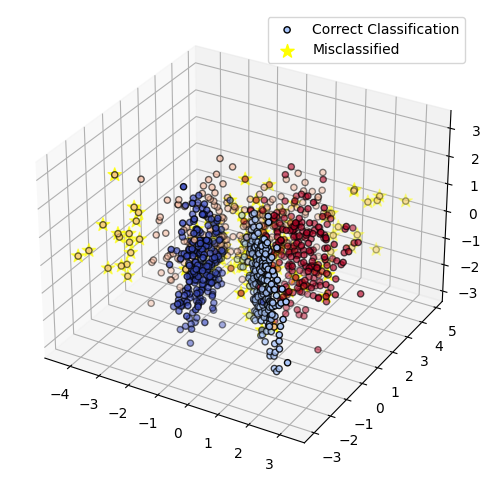

In [ ]:
predicted = model1.predict(x)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Correct Classification')
misclassified = x[y != predicted]
ax.scatter(misclassified[:, 0], misclassified[:, 1], misclassified[:, 2], c='yellow', marker='*', s=100, label='Misclassified')
plt.legend()
plt.show()

**SGDClassifier**

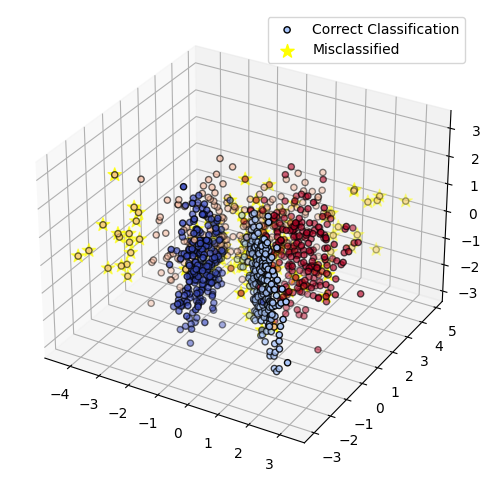

In [ ]:
predicted = model1.predict(x)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Correct Classification')
misclassified = x[y != predicted]
ax.scatter(misclassified[:, 0], misclassified[:, 1], misclassified[:, 2], c='yellow', marker='*', s=100, label='Misclassified')
plt.legend()
plt.show()

**Desision boundaries and Areas**

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# This code is for plotting the decision regions of a classification model along with highlighting the misclassified points:

def plot_region(x, y, model, name='Train data'):
    hat = model.predict(x)
    miss = x[y != hat]

    scatter_highlight_kwargs = {'s': 50, 'label': 'Missclassified', 'alpha': 0.8, 'linewidth': 2}
    ax = plot_decision_regions(x, y, clf=model, legend=0, X_highlight=miss, scatter_highlight_kwargs=scatter_highlight_kwargs)

    ax.legend(loc='upper right')
    ax.set_title(f'Decision region for {name}')
    ax.set_xlabel('Latent feature 1')
    ax.set_ylabel('Latent feature 2')

In [ ]:
#dimensionality reduction
tsne = TSNE (n_components = 2, verbose = 0, random_state = 24)   #reduces the data to 2 dimensions
data_reduced = tsne.fit_transform(x,y)     # new x

x_train_r, x_test_r, y_train_r, y_test_r = train_test_split( data_reduced, y, test_size = 0.2 ,random_state = 24)

Text(0, 0.5, 'latent feature 2')

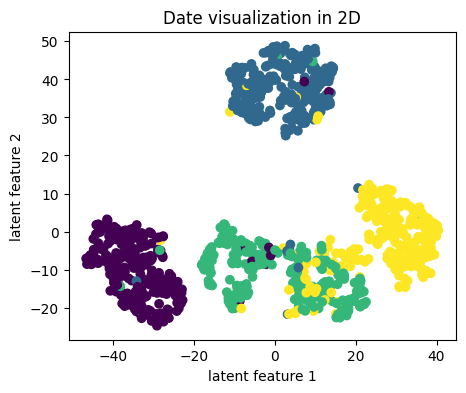

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter( data_reduced[:,0], data_reduced[:,1], c = y)
plt.title('Date visualization in 2D')
plt.xlabel('latent feature 1')
plt.ylabel('latent feature 2')

In [ ]:
# scaling
scaler = StandardScaler().fit(x_train_r)
x_train_r_s  = scaler.transform(x_train_r)
x_test_r_s  = scaler.transform(x_test_r)

In [ ]:
lr_model= LogisticRegression( penalty = 'l2', solver = 'sag', max_iter = 5 , random_state = 24)

sgd_model = SGDClassifier( penalty = 'l2', max_iter = 24 , learning_rate = 'constant', eta0 = 0.049 , random_state = 24)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavio

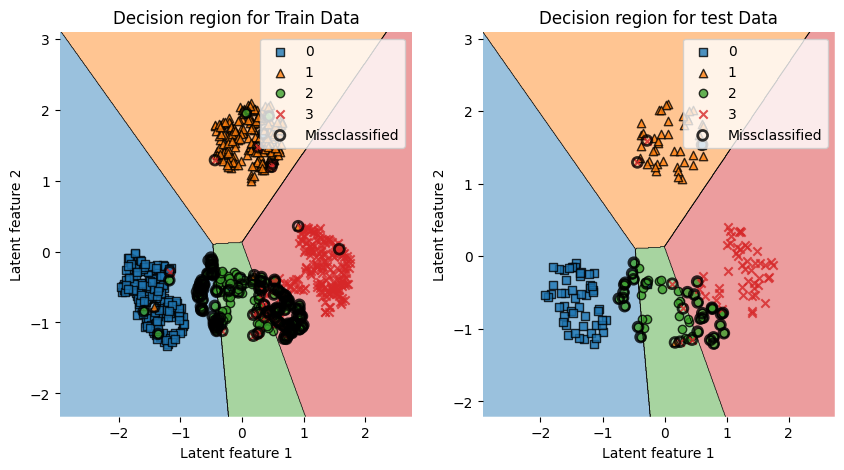

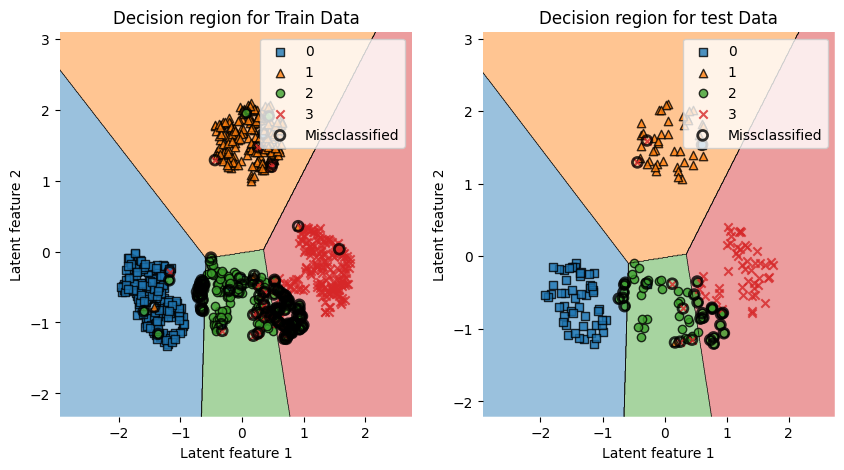

In [ ]:
models = [lr_model, sgd_model]
model_names = ['lr_model', 'sgd_model']

# Train model with new latent data
for i, m in enumerate(models):
    m.fit(x_train_r_s,y_train)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plot_region(x_train_r_s, y_train_r, m, 'Train Data')
    plt.subplot(1,2,2)
    plot_region(x_test_r_s, y_test_r, m,'test Data' )

## بخش پنجم

In [ ]:
#Install drawdata
!pip install drawdata
!pip install pandas polars
from drawdata import ScatterWidget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.8/246.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.6/730.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.3/383.3 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#Draw data
widget = ScatterWidget()
widget

ScatterWidget()

In [ ]:
#Making x and y
data = widget.data_as_pandas
x1 = data['x'].values
x2 = data['y'].values
x0 = np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1)], axis=1)
o = data["label"].values
y0 = np.where(o == 'a', 1, 0)

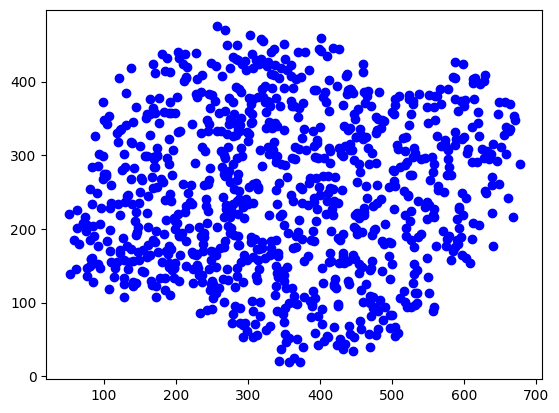

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x0[:, 0], x0[:, 1], 'bo')
plt.show()

In [ ]:
#Making train and test data
x_train, x_test, y_train, y_test = train_test_split(x0, y0, test_size=0.2, random_state=24)

*Logistic Regression*

In [ ]:
model1 = LogisticRegression(solver='sag', max_iter=200, random_state=24)
model1.fit(x_train, y_train)
print("Logistic Regression")
print(" Train data score:",format(model1.score(x_train, y_train)))
print(" Test data score:",format(model1.score(x_test, y_test)))

Logistic Regression
 Train data score: 0.8955823293172691
 Test data score: 0.8823529411764706


<Axes: >

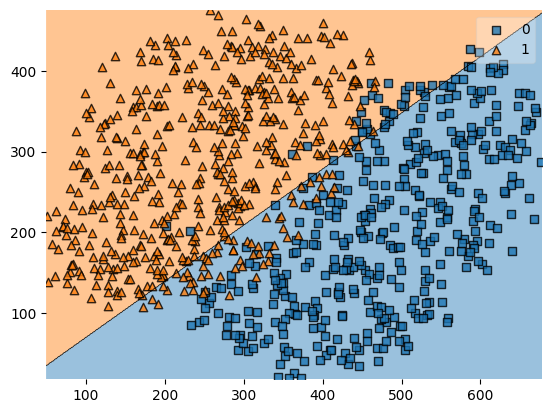

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x0, y0, clf=model1)

*SGDClassifier*

In [ ]:
model2 = SGDClassifier(loss='log_loss', random_state=24)
model2.fit(x_train, y_train)
print("SGDClassifier")
print(" Train data score:",format(model2.score(x_train, y_train)))
print(" Test data score:",format(model2.score(x_test, y_test)))

SGDClassifier
 Train data score: 0.8165997322623829
 Test data score: 0.786096256684492


<Axes: >

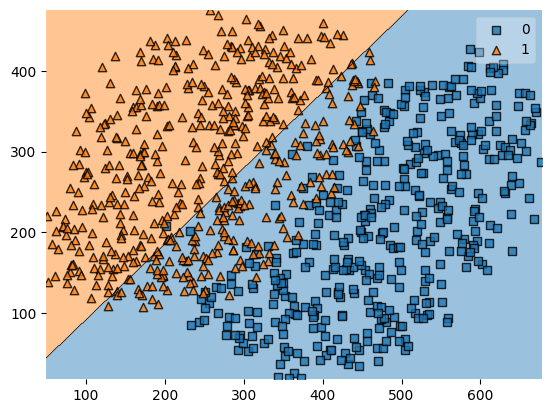

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x0, y0, clf=model2)

# سوال دوم

## بخش اول

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
!pip install --upgrade --no-cach-dir gdown
! gdown 1BUoNWwNKZoJDcuFBa3tevkZA8KqijAun
! gdown 1uWHDIm_7hZy4-s8XlVPr5DhPJzny_dMB


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From (original): https://drive.google.com/uc?id=1BUoNWwNKZoJDcuFBa3tevkZA8KqijAun
From (redirected): https://drive.google.com/uc?id=1BUoNWwNKZoJDcuFBa3tevkZA8KqijAun&confirm=t&uuid=4590f348-dbe7-4157-8573-0d807f57468f
To: /content/97.mat
100% 3.90M/3.90M [00:00<00:00, 79.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1uWHDIm_7hZy4-s8XlVPr5DhPJzny_dMB
From (redirected): https://drive.google.com/uc?id=1uWHDIm_7hZy4-s8XlVPr5DhPJzny_dMB&confirm=t&uuid=aec93ee1-9f98-4c6b-be07-8b9cd74358eb
To: /content/105.mat
100% 2.91M/2.91M [00:00<00:00, 66.1MB/s]


In [ ]:
! pip install scipy
import scipy.io as sio
from scipy.io import loadmat

data_n = sio.loadmat('97.mat')
data_f = sio.loadmat('105.mat')

#n = list(data_n.keys())
#print(n )
#f = list(data_f.keys())
#print(f )

In [ ]:
#colse of normal and fualt
columns_n = list(data_n.keys())[-3:]    # data in normal dataset
columns_f = list(data_f.keys())[-4:]    #data in fault dataset
print (columns_n)
print (columns_f)
all_columns= np.concatenate((columns_n, columns_f))

['X097_DE_time', 'X097_FE_time', 'X097RPM']
['X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM']


## بخش دوم

### بخش دوم-قسمت اول

The following code generates a m*n matrix for each time series function.

In [ ]:
#import numpy as np
#import scipy.io as sio

#def extract_samples(time_series, m, n):
#    num_samples = len(time_series) - n + 1
#    samples = np.zeros((m, n))

#    for i in range(m):
#       start_index = np.random.randint(0, num_samples)
#        samples[i] = time_series[start_index:start_index+n, 0]  # Ensure slicing works correctly

#    return samples



#data_n = sio.loadmat('97.mat')
#time_series_data = data_n['X097_DE_time']  # Assuming 'data' is the variable name in the .mat file
#m = 300
#n = 300
#samples_matrix = extract_samples(time_series_data, m, n)
#print(samples_matrix.head)

The code below is the general mode and we create the m*n matrix for all classes

In [ ]:
M = 300
N = 300
matrices = {}

for col in all_columns:
    mat = np.zeros((M, N))
    for j in range(M):
        if col in data_n:
            if j + N <= len(data_n[col]):
                mat[j, :] = data_n[col][j:j + N].reshape(-1,)
            else:
                mat[j, :] = np.nan
        elif col in data_f:
            if j + N <= len(data_f[col]):
                mat[j, :] = data_f[col][j:j + N].reshape(-1,)
            else:
                mat[j, :] = np.nan
        else:
            mat[j, :] = np.nan
    matrices[col] = mat

for i,col in enumerate(all_columns):
    mat_size = matrices[col].shape
    print(f'Class "{col}"\'s matrix has the shape of {mat_size}')

Class "X097_DE_time"'s matrix has the shape of (300, 300)
Class "X097_FE_time"'s matrix has the shape of (300, 300)
Class "X097RPM"'s matrix has the shape of (300, 300)
Class "X105_DE_time"'s matrix has the shape of (300, 300)
Class "X105_FE_time"'s matrix has the shape of (300, 300)
Class "X105_BA_time"'s matrix has the shape of (300, 300)
Class "X105RPM"'s matrix has the shape of (300, 300)


There are seven classes in total, since the question asked us to have one class for each normal and fault state, we will choose one class from each category and proceed accordingly.

In [ ]:
normal_mat = matrices['X097_DE_time']
fault_mat = matrices['X105_DE_time']

###بخش دوم-قسمت دوم

In [ ]:
class Features:

    def __init__(self,matrix):
        self.matrix = matrix
        self._extract()

    def _extract(self):
        self.features = {
            'standard deviation': stats.tstd(self.matrix, axis=1),
            'peak': np.max(self.matrix, axis=1),
            'skewness': stats.skew(self.matrix, axis=1),
            'square root mean': np.square(np.mean(np.sqrt(np.abs(self.matrix)), axis=1)),
            'kurtosis': stats.kurtosis(self.matrix, axis=1),
            'crest factor': np.max(self.matrix, axis=1) / np.sqrt(np.mean(np.square(self.matrix), axis=1)),
            'clearance factor': np.max(self.matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(self.matrix)), axis=1)),
            'mean': np.mean(self.matrix, axis=1),
            'absolute mean': np.mean(np.abs(self.matrix), axis=1),
            'root mean square': np.sqrt(np.mean(np.square(self.matrix), axis=1)),
        }

    def __getitem__(self,key):
        return self.features[key]


normal_features = Features(normal_mat)
fault_features = Features(fault_mat)

In [ ]:
#  Normal data label ---> 0
df_normal = pd.DataFrame(normal_features.features)
df_normal['label'] = np.zeros((df_normal.shape[0],), dtype='int8')

#  Fault data label --> 1
df_fault = pd.DataFrame(fault_features.features)
df_fault['label'] = np.ones((df_fault.shape[0],), dtype='int8')

# Stacking both datasets
df = pd.concat ([df_normal, df_fault], ignore_index=True)
df

standard deviation      peak  skewness  square root mean  kurtosis  \
0              0.083577  0.217794 -0.345679          0.062231 -0.398710   
1              0.083564  0.217794 -0.338346          0.062037 -0.400868   
2              0.083485  0.217794 -0.328538          0.061793 -0.398773   
3              0.083353  0.217794 -0.320434          0.061443 -0.391665   
4              0.083315  0.217794 -0.316926          0.061286 -0.389052   
..                  ...       ...       ...               ...       ...   
595            0.306771  1.160112  0.169925          0.184928  1.678523   
596            0.306961  1.160112  0.168081          0.185190  1.667488   
597            0.306505  1.160112  0.179658          0.184528  1.694961   
598            0.306714  1.160112  0.186509          0.185050  1.684803   
599            0.306815  1.160112  0.176804          0.185356  1.676449   

     crest factor  clearance factor      mean  absolute mean  \
0        2.566209          3.499770  0.015528       0.070864   
1        2.567792          3.510731  0.015308       0.070730   
2        2.572172          3.524582  0.014936       0.070510   
3        2.578067          3.544672  0.014568       0.070214   
4        2.579855          3.553729  0.014445       0.070091   
..            ...               ...       ...            ...   
595      3.783057          6.273332  0.015664       0.227369   
596      3.780546          6.264455  0.015948       0.227653   
597      3.787089          6.286921  0.014428       0.226940   
598      3.784987          6.269173  0.013592       0.227356   
599      3.783127          6.258818  0.014675       0.227640   

     root mean square  label  
0            0.084870      0  
1            0.084818      0  
2            0.084673      0  
3            0.084480      0  
4            0.084421      0  
..                ...    ...  
595          0.306660      1  
596          0.306864      1  
597          0.306333      1  
598          0.306504      1  
599          0.306654      1  

[600 rows x 11 columns]

###بخش دوم-قسمت سوم

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.drop('label', axis=1, inplace=False).values,   #as x
    df.label.values,                                  #as y
    test_size = 0.2,
    shuffle = True,
    random_state = 24
)

print(f'Size of Train data is:\nX --> {x_train.shape}\ny --> {y_train.shape}')
print(f'Size of Test data is:\nX --> {x_test.shape}\ny --> {y_test.shape}')

Size of Train data is:
X --> (480, 10)
y --> (480,)
Size of Test data is:
X --> (120, 10)
y --> (120,)


###بخش دوم-قسمت چهارم

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

##بخش سوم

Creating a classification model without using the Python library

**"Logistic Regression"**

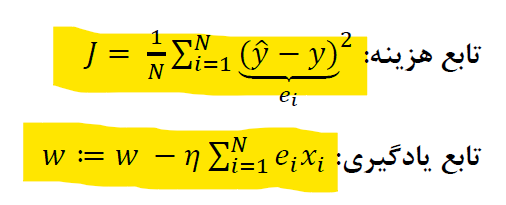

In [ ]:
class LogisticRegression:

    def __init__(self, n_iter=20, learning_rate=0.05, random_state=None):
        self.n_iter = n_iter
        self.eta = learning_rate
        np.random.seed(random_state)

    def _weight_init(self, num_features):
        self.w = np.random.rand(num_features) * 0
        self.b = np.random.rand()

    def _update(self, x, E):َ
        dj = np.dot(x.T, E)
        self.w += self.eta * dj
        self.b += self.eta * np.sum(E)

    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        a = 1 / (1 + np.e**(-z))
        y_hat = np.array([1 if hat > 0.5 else 0 for hat in a])
        return y_hat

    def error(self, predict, true):         #predict => y_hat   and  true => y
        E = true - predict
        e = 1 / len(true) * np.dot(E, E)
        return E, e

    def train(self, x, y):
        num_features = x.shape[1]          # Number of features or number of columns
        self._weight_init(num_features)
        self.loss = []
        for iter in range(self.n_iter):
            y_hat = self.forward(x)
            E, e = self.error(y_hat, y)
            self.loss.append(e)
            self._update(x, E)


# Train model with data
model = LogisticRegression(n_iter=20, learning_rate=0.001, random_state=24)
model.train(x_train_scaled, y_train)


Text(0.5, 0, 'Iteration')

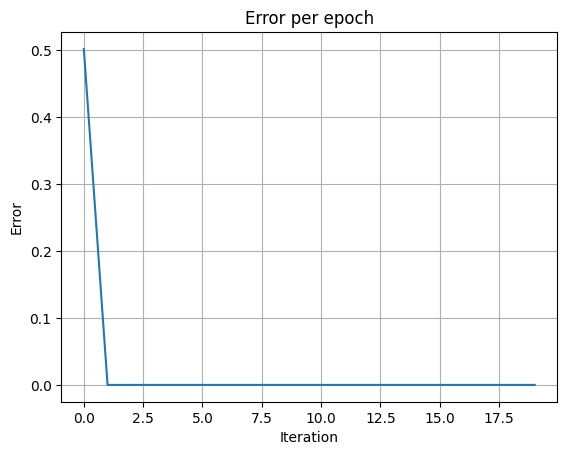

In [ ]:
# Plot loss
plt.plot(model.loss)
plt.title('Error per epoch')
plt.grid(True)
plt.ylabel('Error')
plt.xlabel('Iteration')

In [ ]:
# Predict test values
y_hat = model.forward(x_test_scaled)

# Confusion matrix
TP = np.sum(y_hat[y_test==1])                # Number of true positives
TN = np.sum(np.abs(y_hat[y_test==0]-1))      # Number of true negatives
FP = np.sum(y_hat[y_test==0])                # Number of false positives
FN = np.sum(np.abs(y_hat[y_test==1]-1))      # Number of false negatives

# Accuracy
accuracy = (TP+TN)/len(y_test)
print(f'Accuracy on test data is {accuracy*100:.1f}%')

# F1-score
precision = TP / (TP+FP)
recall = TP / (TP+FN)
f1_score = 2 * (precision*recall)   /(precision+recall)
print(f'F1-score on test data is {f1_score*100:.1f}% ')

Accuracy on test data is 100.0%
F1-score on test data is 100.0% 


## بخش چهارم

In [ ]:
from sklearn.linear_model import SGDClassifier

class SGDwithLoss(SGDClassifier):
    def __init__(self):
        super().__init__()
        self.loss_history = []

    def partial_fit(self, X, y, classes=None, sample_weight=None):

        super().partial_fit(X, y, classes=classes, sample_weight=sample_weight)
        y_hat  = self.predict(X)
        error =  y_hat-y
        loss = 1/len(y) *  np.dot(error,error)    #mean squared error (MSE)
        self.loss_history.append(loss)

Text(0.5, 0, 'Iteration')

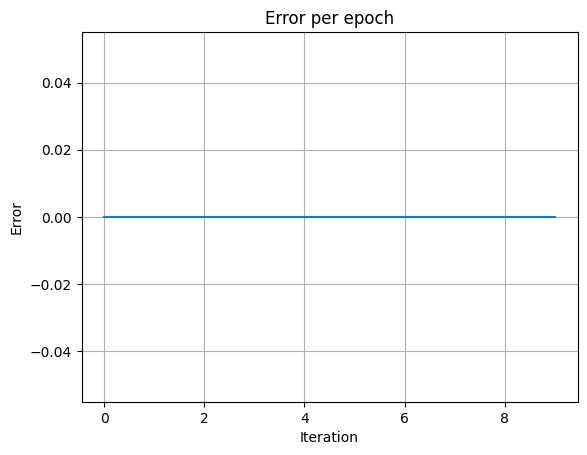

In [ ]:
sgd_model = SGDwithLoss()
sgd_loss = []
NIteration = 10

for i in range(NIteration):
    sgd_model.partial_fit(x_train_scaled, y_train, classes=np.unique(y_train))

plt.plot(sgd_model.loss_history)
plt.title('Error per epoch')
plt.grid(True)
plt.ylabel('Error')
plt.xlabel('Iteration')

In [ ]:
# ارزیابی ها
y_hat = sgd_model.predict(x_test_scaled)

# Confusion matrix
TP = np.sum(y_hat[y_test==1])                 # Count True Positives: Sum of predicted positive values where actual value is 1

TN = np.sum(np.abs(y_hat[y_test==0]-1))       # Count True Negatives: Sum of predicted negative values where actual value is 0

FP = np.sum(y_hat[y_test==0])                 # Count False Positives: Sum of predicted positive values where actual value is 0

FN = np.sum(np.abs(y_hat[y_test==1]-1))       # Count False Negatives: Sum of predicted negative values where actual value is 1

# Accuracy
accuracy = (TP+TN)/len(y_test)
print(f'Accuracy on test data is {accuracy*100:.1f}%')

# F1-score
precision = TP / (TP+FP)
recall = TP / (TP+FN)
f1_score = 2 * (precision*recall)   /(precision+recall)
print(f'F1-score on test data is {f1_score*100:.1f}% ')



Accuracy on test data is 100.0%
F1-score on test data is 100.0% 


# سوال سوم

## بخش اول

In [ ]:
!pip install opendatasets
!pip install pandas
!pip install --upgrade --no-cache-dir gdown
!gdown 128RUv9k-zs0Zoq3src6MU0HVeHPggLCZ

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=128RUv9k-zs0Zoq3src6MU0HVeHPggLCZ
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 105MB/s] 


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/HW1/weatherHistory.csv')
df

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                       251.0          15.8263         0.0   
1                       259.0          15.8263         0.0   
2                       204.0          14.9569         0.0   
3                       269.0          15.8263         0.0   
4                       259.0          15.8263         0.0   
...                       ...              ...         ...   
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  
0                   1015.13       Partly cloudy throughout the day.  
1                   1015.63       Partly cloudy throughout the day.  
2                   1015.94       Partly cloudy throughout the day.  
3                   1016.41       Partly cloudy throughout the day.  
4                   1016.51       Partly cloudy throughout the day.  
...                     ...                                     ...  
96448               1014.36  Partly cloudy starting in the morning.  
96449               1015.16  Partly cloudy starting in the morning.  
96450               1015.66  Partly cloudy starting in the morning.  
96451               1015.95  Partly cloudy starting in the morning.  
96452               1016.16  Partly cloudy starting in the morning.  

[96453 rows x 12 columns]

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
columns_name = df.columns
columns_name

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
df_new = df[['Apparent Temperature (C)','Humidity','Temperature (C)']]
df_new

Apparent Temperature (C)  Humidity  Temperature (C)
0                      7.388889      0.89         9.472222
1                      7.227778      0.86         9.355556
2                      9.377778      0.89         9.377778
3                      5.944444      0.83         8.288889
4                      6.977778      0.83         8.755556
...                         ...       ...              ...
96448                 26.016667      0.43        26.016667
96449                 24.583333      0.48        24.583333
96450                 22.038889      0.56        22.038889
96451                 21.522222      0.60        21.522222
96452                 20.438889      0.61        20.438889

[95936 rows x 3 columns]

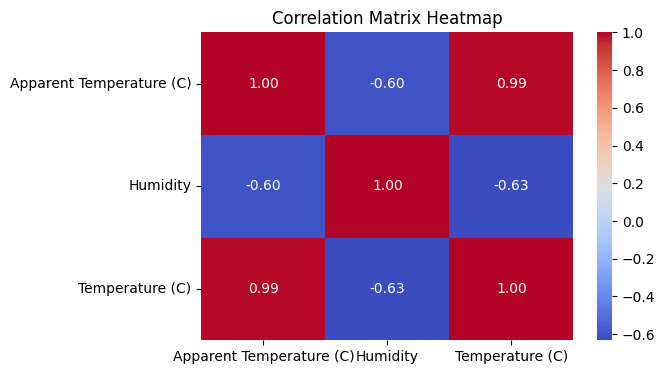

In [ ]:
# Calculating correlation matrix
corr_matrix = df_new.corr()

# Plotting heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


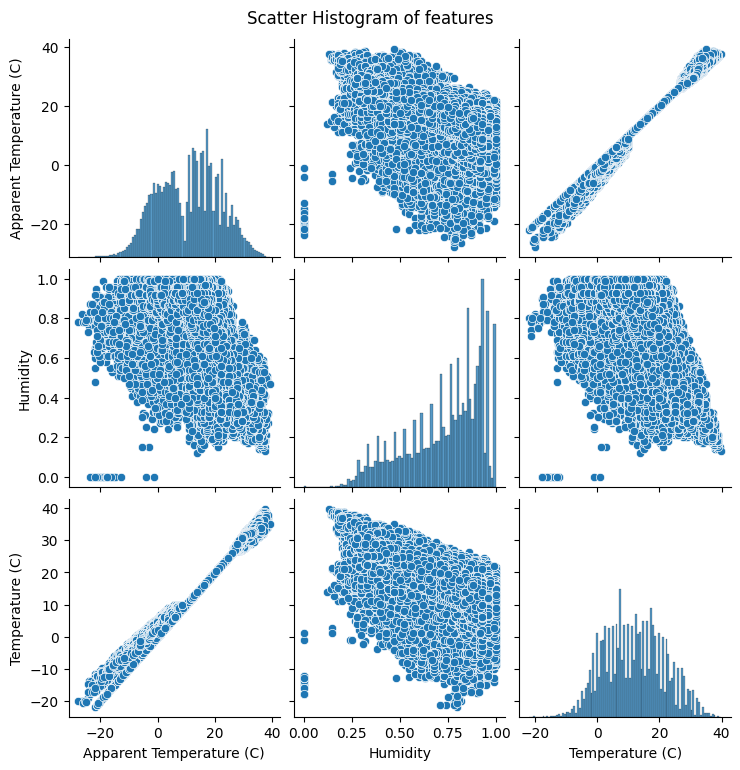

In [ ]:
# Plotting scatter histogram
sns.pairplot(df_new)
plt.suptitle('Scatter Histogram of features', y=1.02)
plt.show()

## بخش دوم

**LS**

"At first, for each of the three features, we create models pairwise (3 cases) (data is divided into training and testing sets), and by observing the outputs and evaluating the models, we find the model with the least error."

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

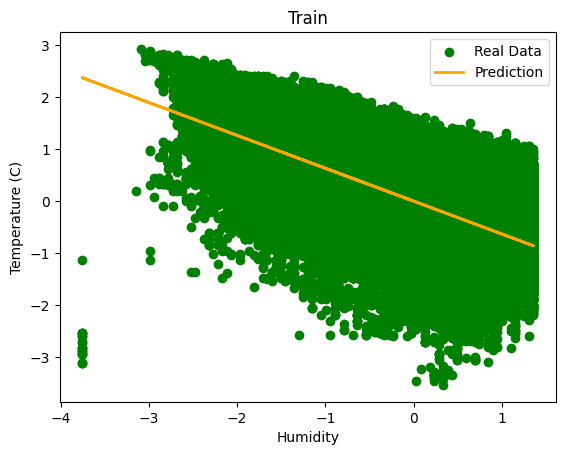

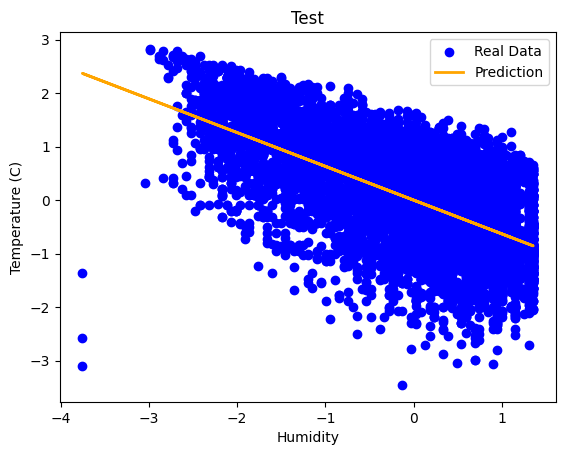

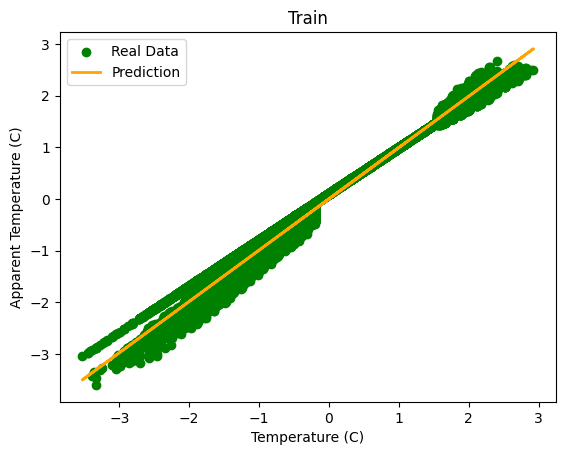

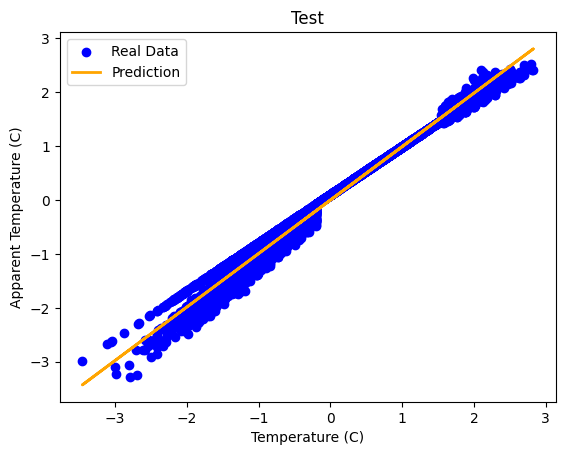

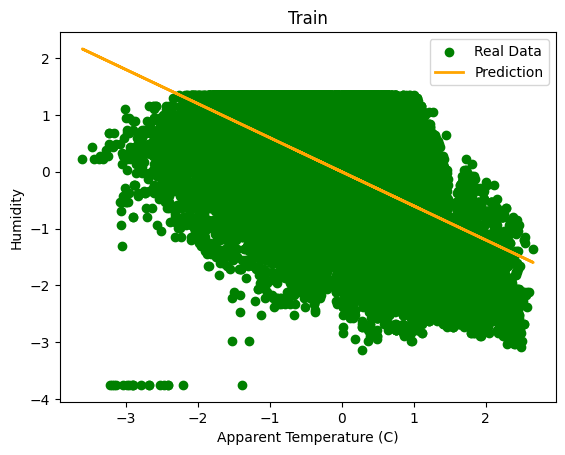

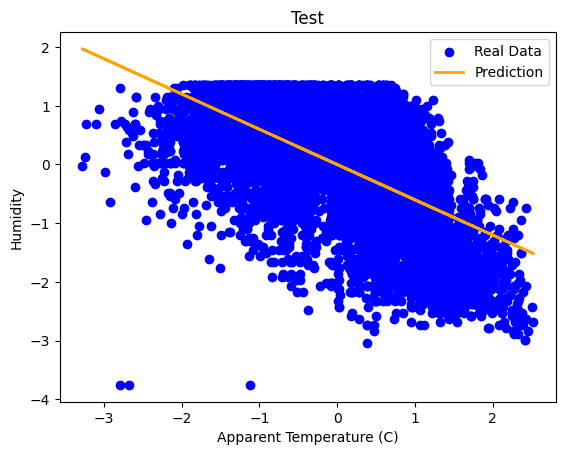

In [ ]:
# Splitting data into train and test sets
np.random.seed(24)
df_train = df_new.sample(frac=0.9)
df_test = df_new[~df_new.isin(df_train)].dropna()
scaler = StandardScaler()

vars = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']
ls_models = {}
metrics = {}

for i, v in enumerate(vars):

    # Input of model
    input_train = df_train[vars[i-1]].values
    output_train = df_train[v].values
    input_test = df_test[vars[i-1]].values
    output_test = df_test[v].values

    # Normalizing values
    input_train_scaled = scaler.fit_transform(input_train.reshape(-1, 1))
    input_test_scaled = scaler.transform(input_test.reshape(-1, 1))
    output_train_scaled = scaler.fit_transform(output_train.reshape(-1, 1))
    output_test_scaled = scaler.transform(output_test.reshape(-1, 1))

    # Model fitting
    ls = LinearRegressionLS()
    ls.fit(input_train_scaled, output_train_scaled)
    ls_models[v] = ls  # Save all LS models


    # Plot Train
    plt.figure()
    plt.scatter(input_train_scaled, output_train_scaled, c='green', label='Real Data')
    hat_train = ls.predict(input_train_scaled)
    plt.plot(input_train_scaled, hat_train, c='orange', linewidth=2, label='Prediction')
    plt.title('Train')
    plt.ylabel(v)
    plt.xlabel(vars[i-1])
    plt.legend()

    # Plot Test
    plt.figure()
    plt.scatter(input_test_scaled, output_test_scaled, c='blue', label='Real Data')
    hat_test = ls.predict(input_test_scaled)
    plt.plot(input_test_scaled, hat_test, c='orange', linewidth=2, label='Prediction')
    plt.title('Test')
    plt.ylabel(v)
    plt.xlabel(vars[i-1])
    plt.legend()

# Displaying plots
plt.show()


**Calculation of errors**

In [ ]:
for i, v in enumerate(vars):

    # Input of model
    input_train = df_train[vars[i-1]].values
    output_train = df_train[v].values
    input_test = df_test[vars[i-1]].values
    output_test = df_test[v].values

    # Normalizing values
    input_train_scaled = scaler.fit_transform(input_train.reshape(-1, 1))
    input_test_scaled = scaler.transform(input_test.reshape(-1, 1))
    output_train_scaled = scaler.fit_transform(output_train.reshape(-1, 1))
    output_test_scaled = scaler.transform(output_test.reshape(-1, 1))

    # Model fitting
    ls = LinearRegressionLS()
    ls.fit(input_train_scaled, output_train_scaled)
    ls_models[v] = ls  # Save all LS models

    # Predictions
    hat_train = ls.predict(input_train_scaled)
    hat_test = ls.predict(input_test_scaled)

    # Matrices
    mse_train = mean_squared_error(output_train_scaled, hat_train)
    mse_test = mean_squared_error(output_test_scaled, hat_test)
    mae_train = mean_absolute_error(output_train_scaled, hat_train)
    mae_test = mean_absolute_error(output_test_scaled, hat_test)
    metrics[f'{vars[i-1]} and {v}'] = {'MSE Train': mse_train, 'MSE Test': mse_test, 'MAE Train': mae_train, 'MAE Test': mae_test}
print(metrics_df)

                                              MSE Train  MSE Test  MAE Train  \
Temperature (C) and Apparent Temperature (C)   0.014702  0.014497   0.092819   
Temperature (C) and Humidity                   0.601704  0.592633   0.625596   
Apparent Temperature (C) and Humidity          0.638664  0.627621   0.648303   

                                              MAE Test  
Temperature (C) and Apparent Temperature (C)  0.092414  
Temperature (C) and Humidity                  0.619873  
Apparent Temperature (C) and Humidity         0.641933  


**Result: The lowest error is related to the model "Temperature (C) and Apparent Temperature (C)"**

***Now we create the model in such a way that the inputs are" Temperature and Humidity" and the output is the feature of" Apparent Temperature".***

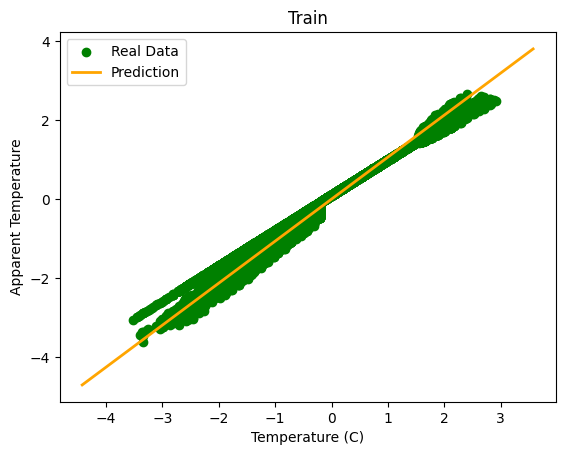

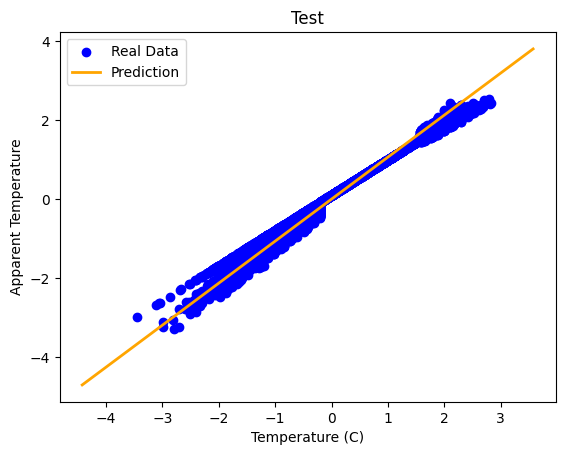

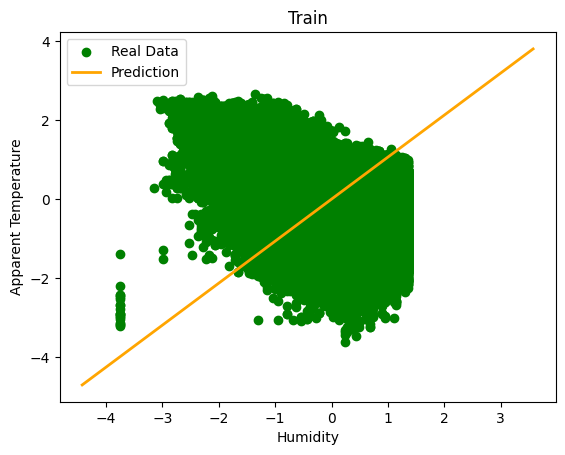

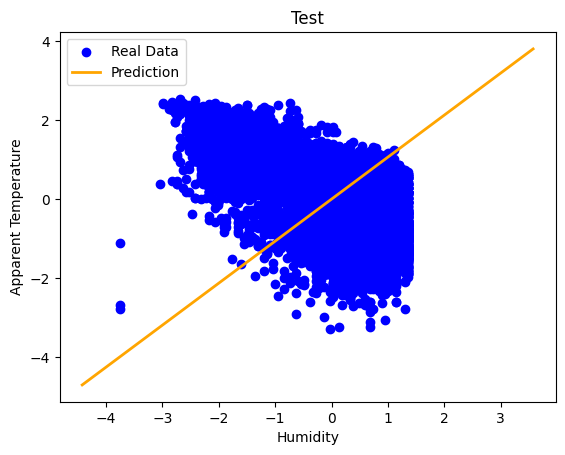

In [ ]:
in_vars = ['Temperature (C)', 'Humidity']
input_train = df_train[['Temperature (C)', 'Humidity']].values
output_train = df_train['Apparent Temperature (C)'].values
input_test = df_test[['Temperature (C)', 'Humidity']].values
output_test = df_test['Apparent Temperature (C)'].values

# Normalizing values
scaler = StandardScaler()
input_train_scaled = scaler.fit_transform(input_train)
input_test_scaled = scaler.transform(input_test)
output_train_scaled = scaler.fit_transform(output_train.reshape(-1, 1))
output_test_scaled = scaler.transform(output_test.reshape(-1, 1))

# New input
in_range = np.max(input_train_scaled) - np.min(input_train_scaled)
t = np.arange(
    np.min(input_train_scaled) - 0.1 * in_range,
    np.max(input_train_scaled) + 0.1 * in_range,
    0.1
)
t = np.column_stack((t, t))

# Model fitting
ls = LinearRegressionLS()
ls.fit(input_train_scaled, output_train_scaled)
ls_models['Apparent Temperature (C)'] = ls  # Save LS model

hat = ls.predict(t)

# Plotting
for i in range(2):
    # Plot Train
    plt.figure()
    plt.scatter(input_train_scaled[:, i], output_train_scaled, c='green', label='Real Data')
    plt.plot(t[:, i], hat, c='orange', linewidth=2, label='Prediction')
    plt.title('Train')
    plt.ylabel('Apparent Temperature')
    plt.xlabel(in_vars[i])
    plt.legend()

    # Plot Test
    plt.figure()
    plt.scatter(input_test_scaled[:, i], output_test_scaled, c='blue', label='Real Data')
    plt.plot(t[:, i], hat, c='orange', linewidth=2, label='Prediction')
    plt.title('Test')
    plt.ylabel('Apparent Temperature')
    plt.xlabel(in_vars[i])
    plt.legend()

In [ ]:
# Matrices
mse_train = mean_squared_error(ls.predict(input_train_scaled), output_train_scaled)
mse_test = mean_squared_error(ls.predict(input_test_scaled), output_test_scaled)
mae_train = mean_absolute_error(ls.predict(input_train_scaled), output_train_scaled)
mae_test = mean_absolute_error(ls.predict(input_test_scaled), output_test_scaled)

metrics = {'MSE Train': mse_train, 'MSE Test': mse_test, 'MAE Train': mae_train, 'MAE Test': mae_test}
print(metrics)


{'MSE Train': 0.0136354261646766, 'MSE Test': 0.01359655036135403, 'MAE Train': 0.08823231877913211, 'MAE Test': 0.08835322626943222}


***RLS***

In [ ]:
class RecursiveLeastSquares:
    def __init__(self, n_features, forgetting_factor=0.99):
        self.n_features = n_features
        self.forgetting_factor = forgetting_factor
        self.theta = np.zeros((n_features, 1))  # Initialize model parameters
        self.P = np.eye(n_features)  # Initialize covariance matrix

    def fit(self, X, y):
        errors = []
        for i in range(len(X)):
            x_i = X[i].reshape(-1, 1)
            y_i = y[i]

            # Predict
            y_pred = np.dot(x_i.T, self.theta)

            # Update
            error = y_i - y_pred
            errors.append(error)
            K = np.dot(self.P, x_i) / (self.forgetting_factor + np.dot(np.dot(x_i.T, self.P), x_i))
            self.theta = self.theta + np.dot(K, error)
            self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x_i.T, self.P)))

        return errors

    def predict(self, X):
        return np.dot(X, self.theta)

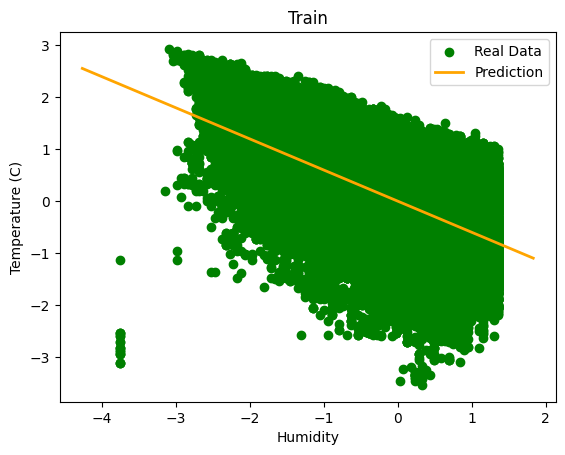

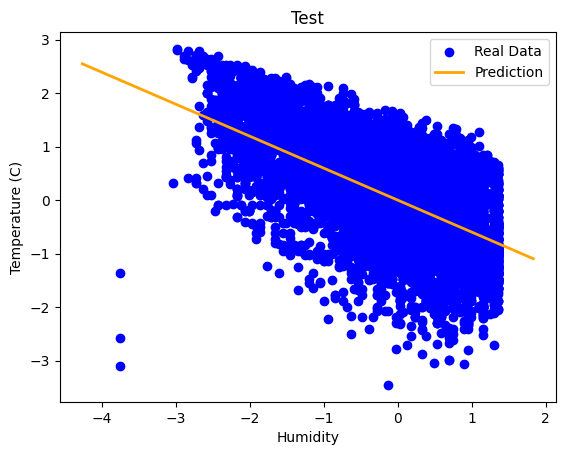

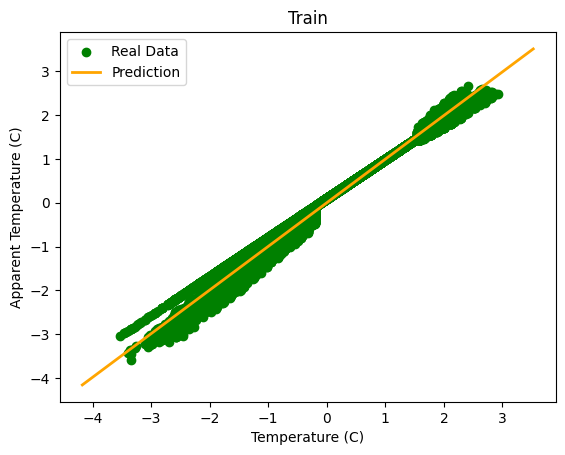

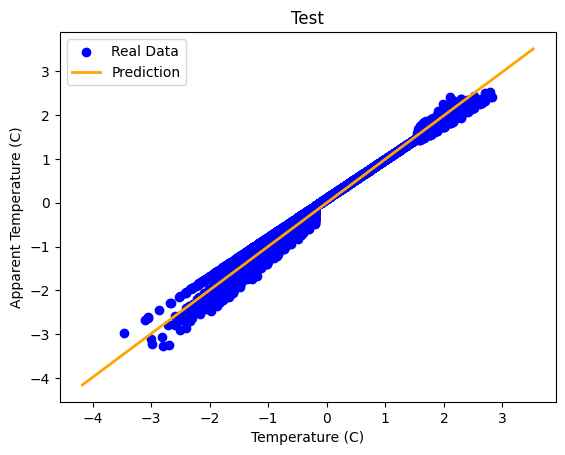

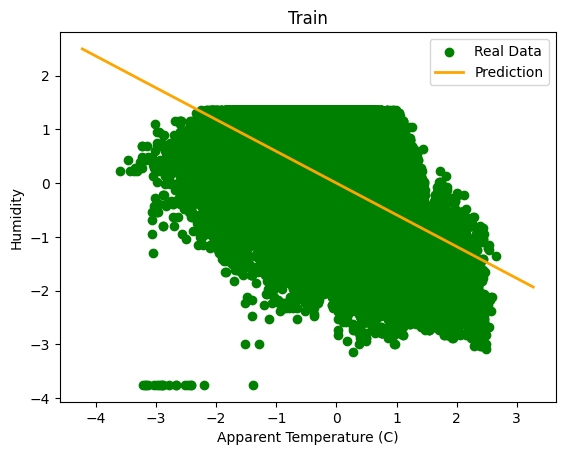

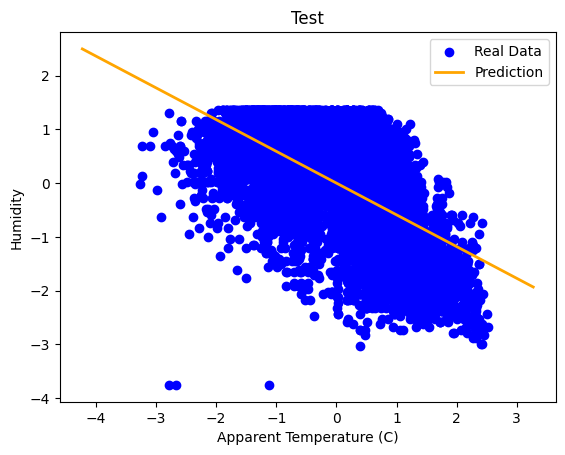

In [ ]:
vars = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']
rls_models = {}
metrices = {}

for i,v in enumerate(vars):

    # Input of model
    input = df_train[vars[i-1]].values
    output = df_train[v].values
    input_test = df_test[vars[i-1]].values
    output_test = df_test[v].values
    # Nomalizing values
    input = scaler.fit_transform(input.reshape(-1,1))
    input_test = scaler.transform(input_test.reshape(-1,1))
    output  = scaler.fit_transform(output.reshape(-1,1))
    output_test = scaler.transform(output_test.reshape(-1,1))
    # continus variable
    in_range = np.max(input) - np.min(input)
    t = np.arange(
        np.min(input)-0.1*in_range,
        np.max(input)+0.1*in_range,
        0.1
    )
    # Model fitting
    rls = RecursiveLeastSquares(n_features=1,forgetting_factor=0.999)
    rls.fit(input,output)
    rls_models[v] = rls # Save all LS models
    hat = rls.predict(t.reshape(-1,1))
    # Plot Train
    plt.figure()
    plt.scatter(input, output, c='green', label='Real Data')
    plt.plot(t,hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Train')
    plt.ylabel(v)
    plt.xlabel(vars[i-1])
    plt.legend()
    # Plot Test
    plt.figure()
    plt.scatter(input_test, output_test, c='blue', label='Real Data')
    plt.plot(t,hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Test')
    plt.ylabel(v)
    plt.xlabel(vars[i-1])
    plt.legend()

    # Matrices
    mse = mean_squared_error(rls.predict(input),output)
    mse_test = mean_squared_error(rls.predict(input_test),output_test)
    mae = mean_absolute_error(rls.predict(input),output)
    mae_test = mean_absolute_error(rls.predict(input_test),output_test)
    metrices[v] = {'MSE Train':mse, 'MSE Test':mse_test, 'MAE Train':mae, 'MAE Test':mae_test}

calculate errors

In [ ]:
for i, v in enumerate(vars):

    # Input of model
    input_train = df_train[vars[i-1]].values
    output_train = df_train[v].values
    input_test = df_test[vars[i-1]].values
    output_test = df_test[v].values

    # Normalizing values
    input_train_scaled = scaler.fit_transform(input_train.reshape(-1, 1))
    input_test_scaled = scaler.transform(input_test.reshape(-1, 1))
    output_train_scaled = scaler.fit_transform(output_train.reshape(-1, 1))
    output_test_scaled = scaler.transform(output_test.reshape(-1, 1))

    # Model fitting
    rls = RecursiveLeastSquares(n_features=1,forgetting_factor=0.999)
    rls.fit(input,output)
    rls_models[v] = rls

    # Predictions
    hat_train = rls.predict(input_train_scaled)
    hat_test = rls.predict(input_test_scaled)

    # Matrices
    mse_train = mean_squared_error(output_train_scaled, hat_train)
    mse_test = mean_squared_error(output_test_scaled, hat_test)
    mae_train = mean_absolute_error(output_train_scaled, hat_train)
    mae_test = mean_absolute_error(output_test_scaled, hat_test)
    metrics[f'{vars[i-1]} and {v}'] = {'MSE Train': mse_train, 'MSE Test': mse_test, 'MAE Train': mae_train, 'MAE Test': mae_test}
print(metrics_df)

                                              MSE Train  MSE Test  MAE Train  \
Temperature (C) and Apparent Temperature (C)   0.014702  0.014497   0.092819   
Temperature (C) and Humidity                   0.601704  0.592633   0.625596   
Apparent Temperature (C) and Humidity          0.638664  0.627621   0.648303   

                                              MAE Test  
Temperature (C) and Apparent Temperature (C)  0.092414  
Temperature (C) and Humidity                  0.619873  
Apparent Temperature (C) and Humidity         0.641933  


**Result: Same as before, The lowest error is related to the model "Temperature (C) and Apparent Temperature (C)" (Because their graph is linear.)**

***Now we create the model in such a way that the inputs are" Temperature and Humidity" and the output is the feature of" Apparent Temperature"(In order to check the effect of increasing the feature).***

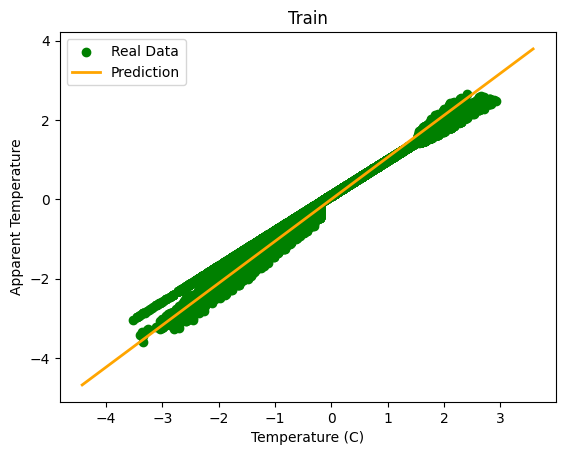

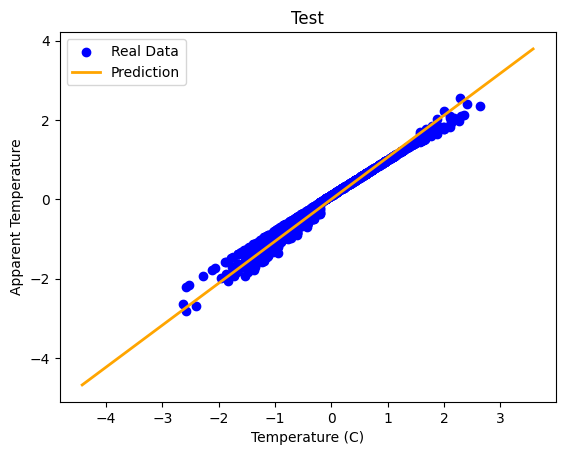

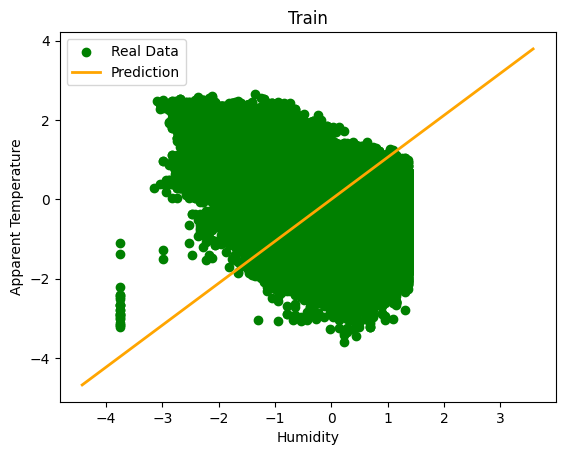

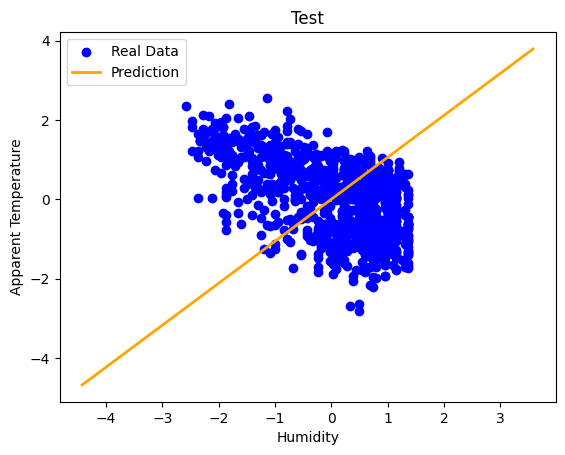

In [ ]:
in_vars = ['Temperature (C)', 'Humidity']
input = df_train[['Temperature (C)', 'Humidity']].values
output = df_train[ 'Apparent Temperature (C)'].values
input_test = df_test[['Temperature (C)', 'Humidity']].values
output_test = df_test['Apparent Temperature (C)'].values
# Nomalizing values
input = scaler.fit_transform(input)
input_test = scaler.transform(input_test)
output  = scaler.fit_transform(output.reshape(-1,1))
output_test = scaler.transform(output_test.reshape(-1,1))
# New input
in_range = np.max(input) - np.min(input)
t = np.arange(
    np.min(input)-0.1*in_range,
    np.max(input)+0.1*in_range,
    0.1
)
t = np.column_stack((t,t))
# Model fitting
rls = RecursiveLeastSquares(n_features=2,forgetting_factor=0.9999)
rls.fit(input,output)
hat = rls.predict(t)
for i in range(2):

    # Plot Train
    plt.figure()
    plt.scatter(input[:,i], output, c='green', label='Real Data')
    plt.plot(t[:,i],hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Train')
    plt.ylabel('Apparent Temperature')
    plt.xlabel(in_vars[i])
    plt.legend()
    # Plot Test
    plt.figure()
    plt.scatter(input_test[:,i], output_test, c='blue', label='Real Data')
    plt.plot(t[:,i],hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Test')
    plt.ylabel('Apparent Temperature')
    plt.xlabel(in_vars[i])
    plt.legend()

In [ ]:
# Matrices
mse = mean_squared_error(rls.predict(input),output)
mse_test = mean_squared_error(rls.predict(input_test),output_test)
mae = mean_absolute_error(rls.predict(input),output)
mae_test = mean_absolute_error(rls.predict(input_test),output_test)
metrices = {'MSE Train':mse, 'MSE Test':mse_test, 'MAE Train':mae, 'MAE Test':mae_test}
print(metrices)

{'MSE Train': 0.013637579188898746, 'MSE Test': 0.013598102174141466, 'MAE Train': 0.08820676312790682, 'MAE Test': 0.08832738218122589}


## بخش سوم

**WLS**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df_new2 = df_new.sample(frac = 1)
np.random.seed(24)
df_train = df_new2.sample(frac=0.99)
df_test = df_new2[~ df.isin(df_train)].dropna()

In [ ]:
import statsmodels.api as sm

class WeightedLeastSquares:
    def __init__(self):
        self.weights = None
        self.model = None

    def fit(self, X, y):
        # Calculate the weights as 1/var(y)
        self.weights = 1 / np.var(y)

        # Fit the WLS model
        X_with_intercept = sm.add_constant(X)  # Add constant term for intercept
        self.model = sm.WLS(y, X_with_intercept, weights=self.weights)
        self.results = self.model.fit()

    def predict(self, X):
        # Add constant term for intercept
        X_with_intercept = sm.add_constant(X)
        return self.results.predict(X_with_intercept)

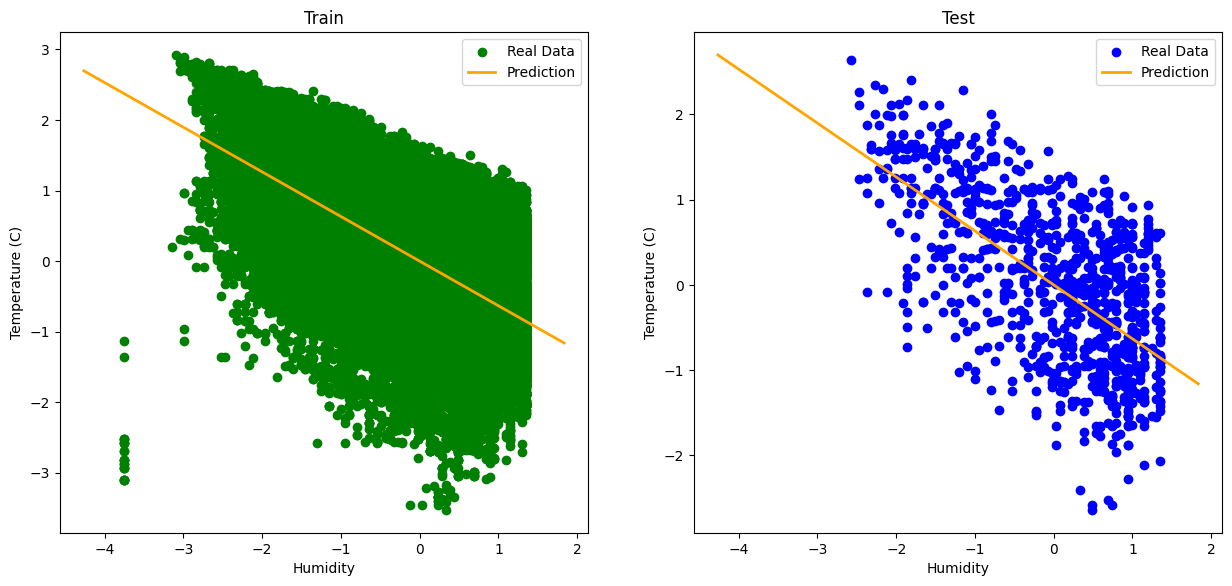

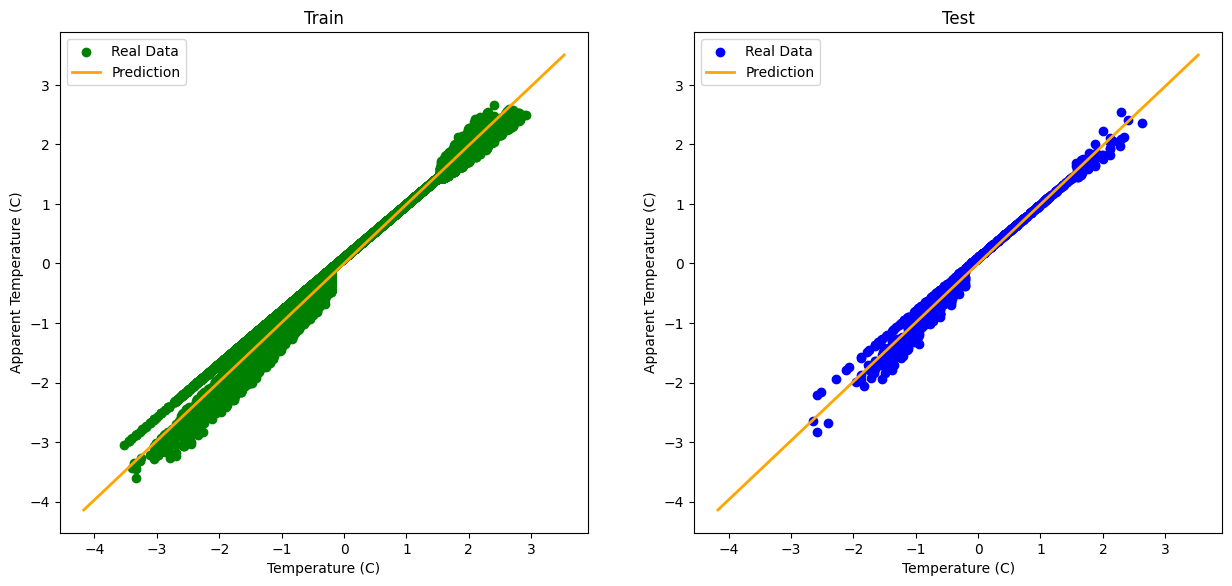

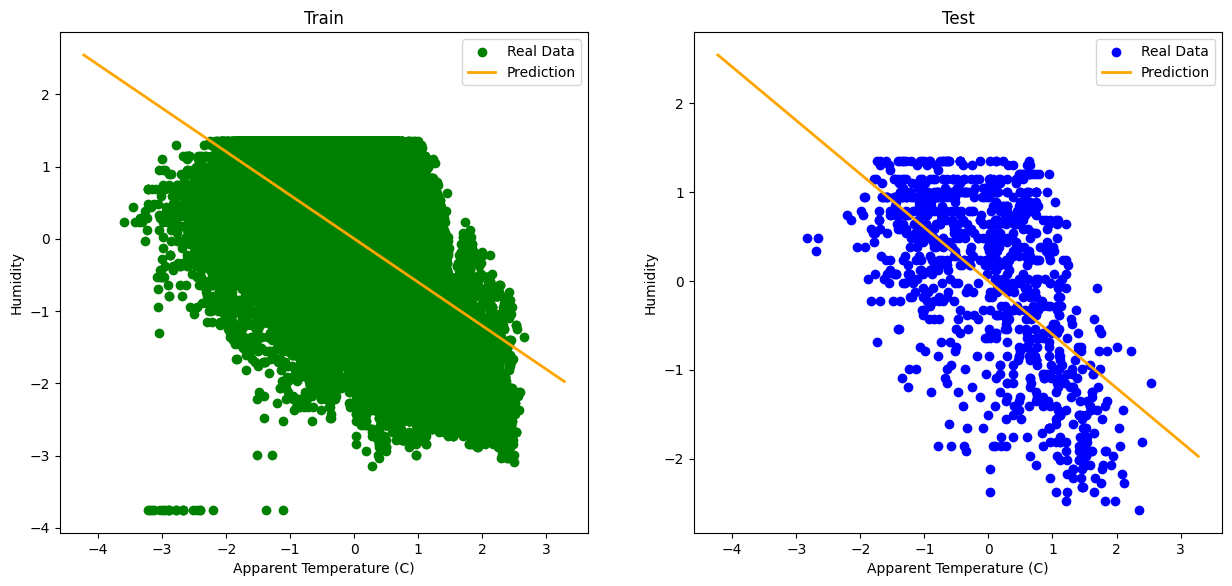

In [ ]:
vars = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']
wls_models = dict()
metrices = dict()
for i,v in enumerate(vars):

    # Input of model
    input = df_train[vars[i-1]].values
    output = df_train[v].values
    input_test = df_test[vars[i-1]].values
    output_test = df_test[v].values
    # Nomalizing values
    input = scaler.fit_transform(input.reshape(-1,1))
    input_test = scaler.transform(input_test.reshape(-1,1))
    output  = scaler.fit_transform(output.reshape(-1,1))
    output_test = scaler.transform(output_test.reshape(-1,1))
    # continus variable
    in_range = np.max(input) - np.min(input)
    t = np.arange(
        np.min(input)-0.1*in_range,
        np.max(input)+0.1*in_range,
        0.1 )
    # Model fitting
    wls = WeightedLeastSquares()
    wls.fit(input,output)
    wls_models[v] = wls # Save all LS models
    hat = wls.predict(t.reshape(-1,1))
    # Plot Train
    plt.figure(figsize=(15,6.5))
    plt.subplot(1,2,1)
    plt.scatter(input, output, c='green', label='Real Data')
    plt.plot(t,hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Train')
    plt.ylabel(v)
    plt.xlabel(vars[i-1])
    plt.legend()
    # Plot Test
    plt.subplot(1,2,2)
    plt.scatter(input_test, output_test, c='blue', label='Real Data')
    plt.plot(t,hat, c='orange',linewidth=2, label='Prediction')
    plt.title('Test')
    plt.ylabel(v)
    plt.xlabel(vars[i-1])
    plt.legend()
    # Matrices
    mse = mean_squared_error(wls.predict(input),output)
    mse_test = mean_squared_error(wls.predict(input_test),output_test)
    mae = mean_absolute_error(wls.predict(input),output)
    mae_test = mean_absolute_error(wls.predict(input_test),output_test)
    metrices[v] = {'MSE Train':mse, 'MSE Test':mse_test, 'MAE Train':mae, 'MAE Test':mae_test}

In [ ]:
for i, v in enumerate(vars):

    # Input of model
    input_train = df_train[vars[i-1]].values
    output_train = df_train[v].values
    input_test = df_test[vars[i-1]].values
    output_test = df_test[v].values

    # Normalizing values
    input_train_scaled = scaler.fit_transform(input_train.reshape(-1, 1))
    input_test_scaled = scaler.transform(input_test.reshape(-1, 1))
    output_train_scaled = scaler.fit_transform(output_train.reshape(-1, 1))
    output_test_scaled = scaler.transform(output_test.reshape(-1, 1))

    # Model fitting
    # Model fitting
    wls = WeightedLeastSquares()
    wls.fit(input_train_scaled, output_train_scaled)


    # Predictions
    hat_train = wls.predict(input_train_scaled)
    hat_test = wls.predict(input_test_scaled)

    # Matrices
    mse_train = mean_squared_error(output_train_scaled, hat_train)
    mse_test = mean_squared_error(output_test_scaled, hat_test)
    mae_train = mean_absolute_error(output_train_scaled, hat_train)
    mae_test = mean_absolute_error(output_test_scaled, hat_test)
    metrics[f'{vars[i-1]} and {v}'] = {'MSE Train': mse_train, 'MSE Test': mse_test, 'MAE Train': mae_train, 'MAE Test': mae_test}
print(metrics_df)

                                              MSE Train  MSE Test  MAE Train  \
Temperature (C) and Apparent Temperature (C)   0.014702  0.014497   0.092819   
Temperature (C) and Humidity                   0.601704  0.592633   0.625596   
Apparent Temperature (C) and Humidity          0.638664  0.627621   0.648303   

                                              MAE Test  
Temperature (C) and Apparent Temperature (C)  0.092414  
Temperature (C) and Humidity                  0.619873  
Apparent Temperature (C) and Humidity         0.641933  


***Now we create the model in such a way that the inputs are" Temperature and Humidity" and the output is the feature of" Apparent Temperature"(In order to check the effect of increasing the feature).***

{'MSE Train': 0.01362250393730625, 'MSE Test': 0.012705777444384636, 'MAE Train': 0.08820606984748902, 'MAE Test': 0.0858594114813934}


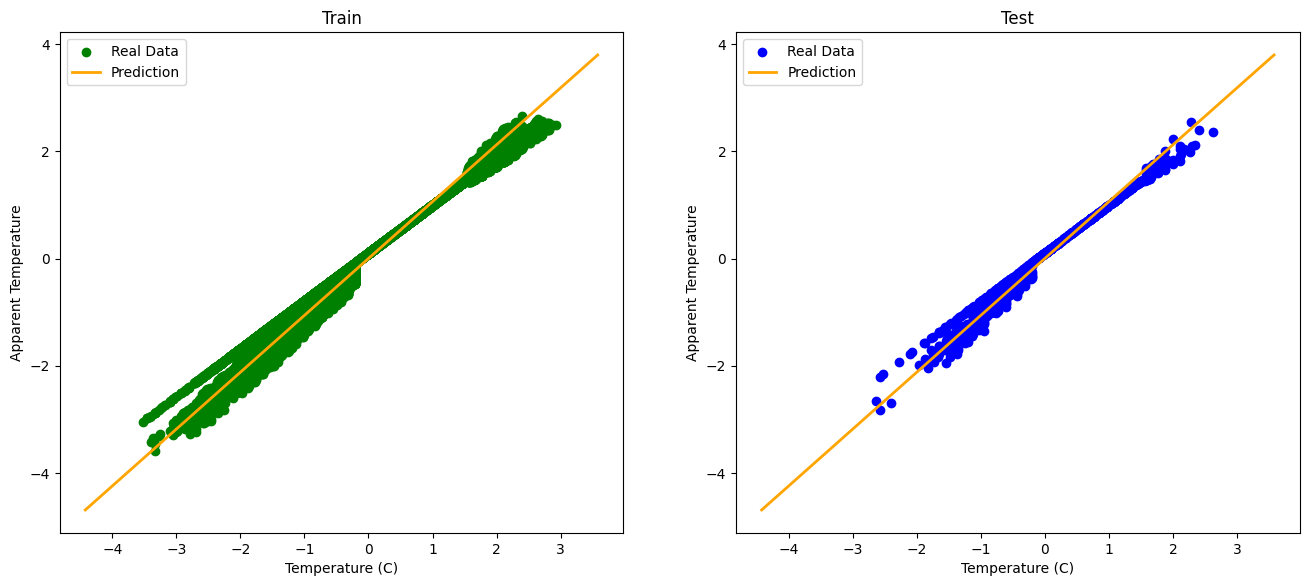

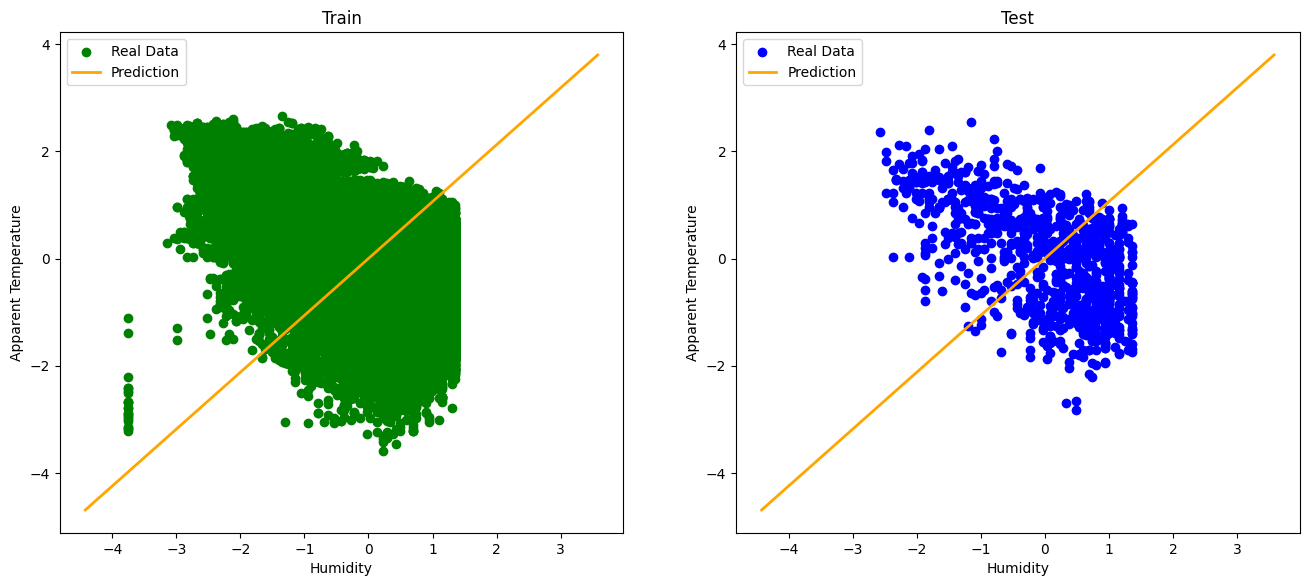

In [ ]:
in_vars = ['Temperature (C)', 'Humidity']
input_train = df_train[in_vars].values
output_train = df_train['Apparent Temperature (C)'].values
input_test = df_test[in_vars].values
output_test = df_test['Apparent Temperature (C)'].values

# Normalize values
input_train_scaled = scaler.fit_transform(input_train)
input_test_scaled = scaler.transform(input_test)
output_train_scaled = scaler.fit_transform(output_train.reshape(-1, 1))
output_test_scaled = scaler.transform(output_test.reshape(-1, 1))

# New input
in_range = np.max(input_train_scaled) - np.min(input_train_scaled)
t = np.arange(
    np.min(input_train_scaled) - 0.1 * in_range,
    np.max(input_train_scaled) + 0.1 * in_range,
    0.1
)
t = np.column_stack((t, t))

# Model fitting
wls = WeightedLeastSquares()
wls.fit(input_train_scaled, output_train_scaled)
hat = wls.predict(t)

metrics = {}

for i in range(2):
    # Plot Train
    plt.figure(figsize=(16, 6.5))
    plt.subplot(1, 2, 1)
    plt.scatter(input_train_scaled[:, i], output_train_scaled, c='green', label='Real Data')
    plt.plot(t[:, i], hat, c='orange', linewidth=2, label='Prediction')
    plt.title('Train')
    plt.ylabel('Apparent Temperature')
    plt.xlabel(in_vars[i])
    plt.legend()

    # Plot Test
    plt.subplot(1, 2, 2)
    plt.scatter(input_test_scaled[:, i], output_test_scaled, c='blue', label='Real Data')
    plt.plot(t[:, i], hat, c='orange', linewidth=2, label='Prediction')
    plt.title('Test')
    plt.ylabel('Apparent Temperature')
    plt.xlabel(in_vars[i])
    plt.legend()

# Matrices
mse_train = mean_squared_error(wls.predict(input_train_scaled), output_train_scaled)
mse_test = mean_squared_error(wls.predict(input_test_scaled), output_test_scaled)
mae_train = mean_absolute_error(wls.predict(input_train_scaled), output_train_scaled)
mae_test = mean_absolute_error(wls.predict(input_test_scaled), output_test_scaled)

metrics = {'MSE Train': mse_train, 'MSE Test': mse_test, 'MAE Train': mae_train, 'MAE Test': mae_test}
print (metrics)